In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("hw6_tips.csv")
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [12]:
# tinh tong bill + tips trong 1 ngay 
daily_avg = df.groupby("day")[["total_bill", "tip"] ].mean().reset_index() 
daily_avg

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [11]:
order = ["Thur", "Fri", "Sat", "Sun"]
daily_avg["day"] = pd.Categorical(daily_avg["day"], categories=order, ordered=True)
daily_avg = daily_avg.sort_values("day")

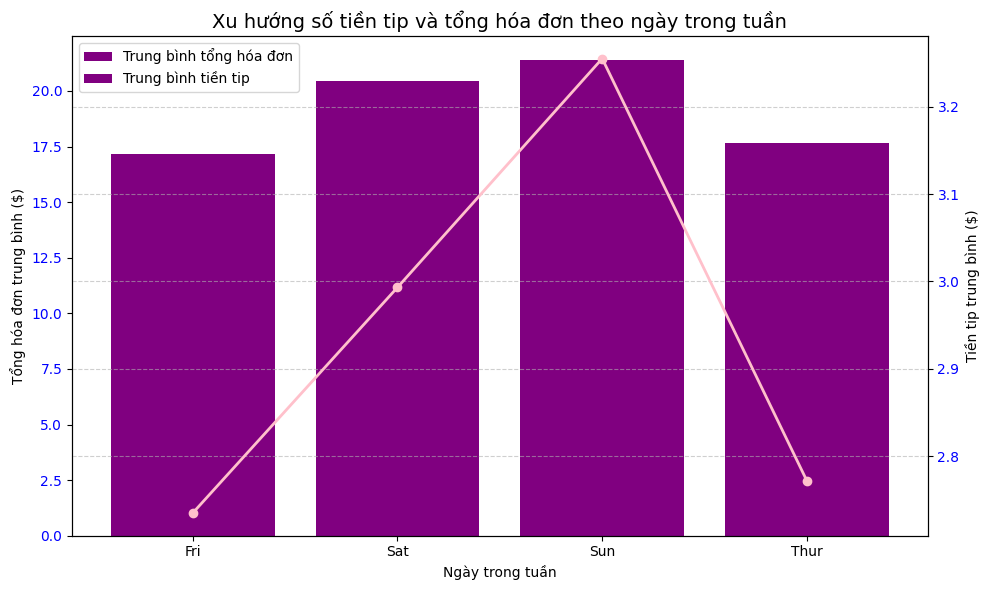

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# cot: total bill
bars = ax1.bar(daily_avg["day"], daily_avg["total_bill"], label="Trung bình tổng hóa đơn", color="purple")

ax1.set_xlabel("Ngày trong tuần")
ax1.set_ylabel("Tổng hóa đơn trung bình ($)")
ax1.tick_params(axis="y", labelcolor="blue")

# line: tip
ax2 = ax1.twinx()
ax2.plot(daily_avg["day"], daily_avg["tip"], color="pink", marker="o", linewidth=2, label="Trung bình tiền tip")
ax2.set_ylabel("Tiền tip trung bình ($)")
ax2.tick_params(axis="y", labelcolor="blue")

# tiêu đề
plt.title("Xu hướng số tiền tip và tổng hóa đơn theo ngày trong tuần", fontsize=14)

# chu thich
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines, labels + labels2, loc="upper left")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

